# Actividad: Problemas de Clasificación

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 4 de Septiembre de 2023

---

## Ejercicio 1

**Instrucciones:** 

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función `loadtxt` de numpy. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

Para tu conjunto de datos:

1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.
2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.
3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos. 
4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.
5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.
6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.
7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

    A. Aplica el método de selección de características con todos los datos.

    B. Ajusta el modelo con las características encontradas.

8. Contesta las siguientes preguntas:

    A. ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?
    
    B. De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

    C. ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

    D. ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

    E. Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?
    

**Último número de matrícula:** 4

> **Conjunto de datos a utilizar:** `P1_3.txt`


### Solución Ejercicio 1

Importamos las librerías necesarias para el ejercicio.

In [86]:
import numpy as np
import numpy.linalg as ln
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

Importamos el Dataset a utilizar.

In [50]:
data = np.loadtxt('P1_3.txt')

Separamos las características de la clase (`X`) y las etiquetas (`y`).

In [51]:
# Separar características (X) y etiquetas (y)
X = data[:, 1:]  # Ignoramos la primera columna
y = data[:, 0]

**Paso 1:** Realizamos un conteo de las etiquetas para saber si es necesario balancear los datos. 

In [52]:
# Contar las clases
class_counts = np.bincount(y.astype(int))
print("Recuento de clases:", class_counts)

Recuento de clases: [   0  298 1496]


Asimismo, realizamos la validación cruzada de un modelo SVM (Support Vector Machine) y obtenemos el reporte de clasificación.

In [53]:
kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.73      0.67      0.70       298
         2.0       0.94      0.95      0.94      1496

    accuracy                           0.91      1794
   macro avg       0.83      0.81      0.82      1794
weighted avg       0.90      0.91      0.90      1794



Como podemos observar, la cantidad de etiquetas de la clase 1 es notoriamente menor a la cantidad de etiquetas de la clase 2, por lo que es necesario balancear los datos. Otro indicio del desbalanceo de los datos es el reporte de clasificación, en el cual se observa que recall de la clase 1 es muy bajo, comparado con el recall de la clase 2.

A continuación, corroboramos el desbalanceo de los datos mediante un condicional if. Si los datos se encuentran desbalanceados, realizamos un balanceo mediante la técnica de subsampling; si los datos se encuentran balanceados, se muestra un mensaje indicando que no es necesario realizar el subsampling. 

Por último, mostramos el reporte de clasificación de los datos balanceados y corroboramos que los datos se encuentran balanceados imprimiendo el recuento de las etiquetas de la clase.

In [54]:
# Verificar si es necesario subsampling
if class_counts[0] != class_counts[1]:

    clf = SVC(kernel='linear')
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(X, y):

        # Training phase
        x_train = X[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        x2 = x_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        if n1 < n2:
            # Realizar subsampling de la clase mayoritaria (clase 2)
            x2_subsampled = resample(x2, n_samples=n1, random_state=42)
            y2_subsampled = resample(y2, n_samples=n1, random_state=42)

            x_sub = np.concatenate((x1, x2_subsampled), axis=0)
            y_sub = np.concatenate((y1, y2_subsampled), axis=0)
        else:
            # Realizar subsampling de la clase minoritaria (clase 1)
            x1_subsampled = resample(x1, n_samples=n2, random_state=42)
            y1_subsampled = resample(y1, n_samples=n2, random_state=42)

            x_sub = np.concatenate((x1_subsampled, x2), axis=0)
            y_sub = np.concatenate((y1_subsampled, y2), axis=0)

        clf.fit(x_sub, y_sub)

        # Test phase
        x_test = X[test_index, :]
        y_test = y[test_index]
        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
else:
    print("No es necesario realizar subsampling, los datos ya están balanceados.")

# Conteo de clases después del subsampling
class_counts_after_subsampling = np.bincount(y_sub.astype(int))
print("Recuento de clases después del subsampling:", class_counts_after_subsampling)

              precision    recall  f1-score   support

         1.0       0.45      0.83      0.58       298
         2.0       0.96      0.80      0.87      1496

    accuracy                           0.80      1794
   macro avg       0.70      0.81      0.73      1794
weighted avg       0.87      0.80      0.82      1794

Recuento de clases después del subsampling: [  0 239 239]


Otra forma de corroborar que los datos fueron balanceados correctamente es mediante el recall previamente obtenido, cuando las clases están desbalanceadas (una tiene muchas más instancias que la otra), los modelos de clasificación tienden a tener un buen recall en la clase mayoritaria y un recall más bajo en la clase minoritaria. Esto se debe a que el modelo puede inclinarse hacia la predicción de la clase mayoritaria para maximizar la precisión global.

En el segundo reporte de clasificación (el obtenido después del subsampling), podemos observar que el recall de ambas clases es similar, lo cual indica que los datos se encuentran balanceados.

**Paso 2:** A continuación, realizamos la validación cruzada de 5 modelos de clasificación distintos: Linear SVM, RBF SVM, K Nearest Neighbors, Decision Tree y LDA. Para ello, definimos un arreglo de modelos y realizamos un ciclo for para entrenar y evaluar cada modelo.

In [55]:
# Definimos los modelos a utilizar
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Linear SVM", SVC(kernel='linear')),
    ("RBF SVM", SVC(kernel='rbf')),
    ("K Nearest Neighbors (KNN)", KNeighborsClassifier()),
    ("LDA", LinearDiscriminantAnalysis())
]

for model_name, model in models:
    print('\n\n=================', model_name, '=================')

    kf = StratifiedKFold(n_splits=5, shuffle=True)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(X, y):

        # Training phase
        x_train = X[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.sample([i for i in range(n2)], n1)

        x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
        y_sub = np.concatenate((y1, y2[ind]), axis=0)

        model.fit(x_sub, y_sub)

        # Test phase
        x_test = X[test_index, :]
        y_test = y[test_index]
        y_pred = model.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



================= Decision Tree =================
              precision    recall  f1-score   support

         1.0       0.33      0.71      0.45       298
         2.0       0.93      0.71      0.80      1496

    accuracy                           0.71      1794
   macro avg       0.63      0.71      0.62      1794
weighted avg       0.83      0.71      0.74      1794



================= Linear SVM =================
              precision    recall  f1-score   support

         1.0       0.51      0.81      0.63       298
         2.0       0.96      0.85      0.90      1496

    accuracy                           0.84      1794
   macro avg       0.73      0.83      0.76      1794
weighted avg       0.88      0.84      0.85      1794



================= RBF SVM =================
              precision    recall  f1-score   support

         1.0       0.57      0.85      0.68       298
         2.0       0.97      0.87      0.92      1496

    accuracy                       

De acuerdo con los resultados obtenidos previamente, podemos observar que los 5 modelos de clasificación obtuvieron un recall similar (balanceado) en ambas clases, siendo los valores más altos los de RBF SVM (0.88 para la clase 1 y 0.86 para la clase 2), asimismo, este modelo obtuvo los valores de precisión más altos (0.56 para la clase 1 y 0.97 para la clase 2). Por último, el modelo RBF SVM obtuvo el valor más alto de F1 Score (0.69 para la clase 1 y 0.92 para la clase 2).

Debido a las razones anteriores, podemos concluir que **el modelo más efectivo para nuestro conjunto de datos es RBF SVM (Radial basis function kernel).**

**Paso 3:** A continuación, implementamos desde cero el método de regresión logística, y lo evaluamos con el conjunto de datos.

In [56]:
# Cambiar las etiquetas de 1 y 2 a 0 y 1
y[y == 1] = 0
y[y == 2] = 1

# Gradiente de la función de error
def gradient(X, y, beta):
    n = len(y)
    xbeta = X @ beta
    exp = np.exp(xbeta)
    res = y - 1 / (1 + exp)
    tmp = (exp / (1 + exp) ** 2) * res * X.T
    return -(2 / n) * np.sum(tmp, axis=1)

# Función predictiva
def predict(X, beta):
    xbeta = X @ beta
    tmp = 1./(1 + np.exp(-xbeta))
    return (tmp > 0.5).astype("int32")

# Función fit model
def fit_model(X, y, alpha=0.0005, max_iter=10000):
    # Número de predictores
    predictors = X.shape[1]

    # Inicializar beta con valores pequeños aleatorios
    beta = 2 * np.random.rand(predictors) - 1

    # Algoritmo de optimización
    it = 0
    while (ln.norm(gradient(X, y, beta)) > 1e-4) and (it < max_iter):
        beta = beta - alpha * gradient(X, y, beta)
        it += 1

    return beta

# Modelo de regresión logística
beta = fit_model(x_sub, y_sub)
print("Model coefficients: ", beta)

# Evaluación del error de clasificación
y_pred = predict(x_sub, beta)
err = np.mean(y_sub != y_pred)

print("Error with training data: ", err)

# Evaluación del modelo con validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    
    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print("\n", classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Model coefficients:  [ 1.26209366e-01  7.04738427e-01  9.64132729e-01  1.91610123e-02
 -2.44399816e-01  3.38391501e-01 -5.13734306e-01  1.00189994e+00
 -9.56554509e-01 -9.75584415e-02 -4.94656008e-01 -1.53520473e-01
 -2.51757629e-01  2.74181707e-02  2.40467871e-02  8.88989036e-01
  4.76980869e-01 -1.05494362e+00  5.66801840e-01 -2.87404047e-01
 -1.71168128e-01 -8.45026814e-01  2.78403083e-01  1.72046897e-01
 -1.95879114e-01 -7.88613248e-01  9.36002623e-02  4.42892776e-01
  1.46511874e-01 -7.29209798e-01 -3.79987213e-01  1.15203620e-01
  9.81018615e-01  5.08766596e-01 -7.00692491e-01  5.91397284e-01
 -7.74104065e-01  8.32499044e-01  6.61515659e-02  4.69951489e-01
  5.47240478e-01 -1.38249210e-01 -1.61890965e-01 -4.54088661e-01
  4.20760809e-01  2.91932775e-01  7.71898820e-01  6.80488353e-01
  1.64047740e-01  2.67635623e-01  6.26831779e-02  2.26026976e-01
 -2.55491098e-01  2.92131883e-01  8.88526215e-01  8.80239921e-01
 -9.50562936e-01 -5.98276543e-01 -6.91855666e-01 -1.96738004e-02
 -5.

**Paso 4:** Utilizando el método de clasificación de RBF SVM, determinamos el número óptimo de características utilizando un método tipo Filter. Para ello, utilizamos el método `SelectKBest` de la librería `sklearn.feature_selection`, el cual selecciona las características de acuerdo con las k puntuaciones más altas. En este caso, utilizamos el método `chi2`, el cual calcula la puntuación chi-cuadrado entre cada característica y la variable de clase.

In [73]:
X = X.clip(min=0)  # Establecemos los valores negativos en cero

# Creamos un clasificador RBF SVM
svm_rbf = SVC(kernel='rbf')

# Creamos una función de puntuación personalizada (f1-score) para la validación cruzada
f1_scorer = make_scorer(f1_score)

# Creamos una lista para almacenar los resultados de rendimiento
performance_results = []

# Iteramos a través de diferentes números de características
for num_features in range(1, X.shape[1] + 1):

    # Seleccionamos las 'num_features' mejores características utilizando chi-cuadrado
    X_selected = SelectKBest(chi2, k=num_features).fit_transform(X, y)
    
    # Realizamos validación cruzada
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kf.split(X_selected, y):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        svm_rbf.fit(X_train, y_train)
        y_pred = svm_rbf.predict(X_test)
        score = f1_score(y_test, y_pred)
        scores.append(score)

    mean_score = np.mean(scores)
    performance_results.append((num_features, mean_score))

# Encontramos el número óptimo de características basado en el F1-score
best_num_features, best_f1_score = max(performance_results, key=lambda x: x[1])

print("Número óptimo de características:", best_num_features)
print("Mejor F1-score:", best_f1_score)
print("\n", classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


Número óptimo de características: 60
Mejor F1-score: 0.937805576316817

               precision    recall  f1-score   support

         0.0       0.23      0.72      0.35       298
         1.0       0.90      0.53      0.67      1496

    accuracy                           0.56      1794
   macro avg       0.57      0.63      0.51      1794
weighted avg       0.79      0.56      0.62      1794



**Paso 5:** Repetimos el proceso anterior, pero esta vez, con un método de selección de características de tipo Wrapper.

In [76]:

# Creamos una función de puntuación personalizada (f1-score) para la validación cruzada
f1_scorer = make_scorer(f1_score)

# Inicializamos SequentialFeatureSelector con validación cruzada
sfs = SequentialFeatureSelector(svm_rbf, n_features_to_select=5, scoring=f1_scorer, cv=StratifiedKFold(n_splits=5, shuffle=True))

# Realizamos la selección de características secuencial
sfs.fit(X, y)

# Obtenemos las características seleccionadas
X_selected = sfs.transform(X)

# Evaluación del modelo con validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X_selected, y):
    
    # Training phase
    x_train = X_selected[train_index, :]
    y_train = y[train_index]
    
    svm_rbf.fit(x_train, y_train)

    # Test phase
    x_test = X_selected[test_index, :]
    y_test = y[test_index]
    y_pred = svm_rbf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Encontrar el número óptimo de características basado en el F1-score
best_num_features = X_selected.shape[1]
best_f1_score = f1_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), average='weighted')

print("Número óptimo de características:", best_num_features)
print("Mejor F1-score:", best_f1_score)
print("\n", classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Número óptimo de características: 5
Mejor F1-score: 0.81507394519473

               precision    recall  f1-score   support

         0.0       0.74      0.18      0.30       298
         1.0       0.86      0.99      0.92      1496

    accuracy                           0.85      1794
   macro avg       0.80      0.59      0.61      1794
weighted avg       0.84      0.85      0.82      1794



**Paso 6:** Asimismo, repetimos el paso 4, pero esta vez, con un método de selección de características de tipo Filter-Wrapper.

In [81]:
# Creamos una función de puntuación personalizada (f1-score) para la validación cruzada
f1_scorer = make_scorer(f1_score)

# Inicializamos listas para almacenar resultados
best_num_features = None
best_f1_score = 0.0

# Realizamos validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for num_features in range(1, X.shape[1] + 1):
    cv_scores = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Seleccionar las primeras 'num_features' características
        X_train_selected = X_train[:, :num_features]
        X_test_selected = X_test[:, :num_features]
        
        # Entrenar y evaluar el clasificador
        svm_rbf.fit(X_train_selected, y_train)
        y_pred = svm_rbf.predict(X_test_selected)
        score = f1_score(y_test, y_pred)
        cv_scores.append(score)
    
    # Calculamos el promedio del F1-score para esta cantidad de características
    mean_score = np.mean(cv_scores)
    
    # Actualizamos los mejores resultados si es necesario
    if mean_score > best_f1_score:
        best_f1_score = mean_score
        best_num_features = num_features

# Imprimimos el número óptimo de características y el mejor F1-score
print("Número óptimo de características:", best_num_features)
print("Mejor F1-score:", best_f1_score)

# Selección de las mejores características
X_selected = X[:, :best_num_features]

# Realizamos validación cruzada con las características seleccionadas
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    svm_rbf.fit(X_train, y_train)
    y_pred = svm_rbf.predict(X_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Imprimimos el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Número óptimo de características: 144
Mejor F1-score: 0.9340109177750783

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.38      0.52       298
         1.0       0.89      0.98      0.93      1496

    accuracy                           0.88      1794
   macro avg       0.86      0.68      0.73      1794
weighted avg       0.88      0.88      0.87      1794



Dados los resultados anteriores, basándonos principalmente en el recall de los informes de clasificación, podemos concluir que el método de selección de características más adecuado para este caso es el método de selección de características de tipo **Filter**, ya que obtuvo valores de recall más parejos y no tan desbalanceados como los otros dos métodos (a pesar de que los otros obtuvieron valores de precisión y recall más altos).

**Paso 7:** Una vez escogido el método de selección de características de tipo Filter, y con el número óptimo de características encontrado (60), preparamos nuestro modelo para producción:

In [87]:
# Modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf')

# Seleccionar características con 60 como número de características
selector = SelectKBest(score_func=f_classif, k=60)
X_selected = selector.fit_transform(x_sub, y_sub)

# Ajustar el modelo SVM con las características seleccionadas
svm_model.fit(X_selected, y_sub)

/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SVC()

### Conclusiones Ejercicio 1

**A. ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

Si no se considera el problema de tener datos desbalanceados en este caso, se pueden obtener resultados sesgados y no representativos. Esto se debe a que los modelos de clasificación tienden a favorecer la clase mayoritaria y tener un bajo rendimiento en la clase minoritaria cuando los datos están desbalanceados. En este contexto, la clase 2 tiene muchas más instancias que la clase 1, lo que significa que si no se aborda el balanceo, el modelo puede predecir principalmente la clase 2 y tener un rendimiento deficiente en la clase 1. Esto se reflejará en valores bajos de recall, precisión y f1-score para la clase 1.

**B. De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

El clasificador que considero más adecuado para estos datos es el modelo RBF SVM (Radial basis function kernel). Este modelo tiene una serie de propiedades que para este conjunto de datos resultaron bastante favorables, entre ellas:

- Alta precisión en ambas clases: El RBF SVM obtuvo valores de precisión más altos tanto para la clase 1 como para la clase 2. Esto significa que es menos propenso a cometer falsos positivos y falsos negativos.

- Balanceado recall: El modelo RBF SVM obtuvo valores de recall más equilibrados en ambas clases, lo que indica que es capaz de identificar correctamente las instancias de ambas clases sin sesgo hacia la clase mayoritaria.

- Buen F1-score: El F1-score del RBF SVM fue sólido tanto para la clase 1 como para la clase 2, lo que significa que logra un buen equilibrio entre precisión y recall.

En resumen, el modelo RBF SVM es el más adecuado para estos datos porque es capaz de identificar correctamente las instancias de ambas clases sin sesgo hacia la clase mayoritaria, y logra un buen equilibrio entre precisión y recall.

**C. ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

Sí, es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo. Esto se demostró en los pasos 4, 5 y 6, donde se utilizó la selección de características para encontrar un subconjunto óptimo de características. Reducir la dimensionalidad puede tener ventajas como la reducción de la complejidad computacional y la eliminación de características irrelevantes o redundantes. Sin embargo, es importante encontrar un equilibrio, ya que una reducción excesiva de características puede llevar a la pérdida de información importante.

**D. ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

El método de selección de características más adecuado para este caso parece ser el método de selección de características de tipo Filter. Este método utiliza medidas estadísticas para evaluar la importancia de cada característica en relación con la variable objetivo sin entrenar un modelo. Además, este método fue capaz de encontrar un subconjunto de características que mejoraron el rendimiento del modelo sin eliminar demasiadas características. También se podría considerar el método de tipo Filter-Wrapper si se requiere un mayor control sobre el rendimiento del modelo.

**E. Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

Para mejorar el rendimiento de los modelos, se pueden considerar las siguientes estrategias:

- Experimentar con hiperparámetros: Ajustar los hiperparámetros de los modelos (por ejemplo, el parámetro C en SVM o el número de vecinos en KNN) podría llevar a mejoras en el rendimiento.

- Utilizar técnicas avanzadas de preprocesamiento: Además de la selección de características, se pueden aplicar técnicas como la normalización de datos, el escalado, la eliminación de valores atípicos y la imputación de datos faltantes para mejorar la calidad de los datos.

- Probar modelos más complejos: Si los modelos actuales no logran el rendimiento deseado, se pueden explorar modelos más avanzados como redes neuronales, ensambles de modelos o modelos de aprendizaje profundo.

- Aumentar la cantidad de datos: Si es posible, recopilar más datos puede ayudar a mejorar el rendimiento del modelo, especialmente si el conjunto de datos es pequeño.

- Experimentar con técnicas de aumento de datos: El aumento de datos implica generar instancias adicionales a partir de las existentes mediante transformaciones como rotaciones, traslaciones o cambios de escala. Esto puede ayudar a equilibrar el conjunto de datos y mejorar el rendimiento.


---

## Ejercicio 2

**Instrucciones:** 

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función `loadtxt` de numpy. A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.

Para este conjunto de datos:

1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

4. Prepara tus modelos para producción haciendo lo siguiente:
    A. Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.

    B. Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

5. Contesta las siguientes preguntas:
    A. ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?
    B. ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.
    C. ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.
    D. ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?

**Penúltimo número de matrícula:** 9

> **Conjunto de datos a utilizar:** `M_5.txt`

### Solución Ejercicio 2

Importamos las librerías necesarias para el ejercicio.

In [127]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Importamos el Dataset a utilizar.

In [112]:
data = np.loadtxt('M_5.txt')

Separamos las características de la clase (`X`) y las etiquetas (`y`).

In [113]:
X = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]

**Paso 1:** Realizamos un conteo de las etiquetas para saber si es necesario balancear los datos. 

In [114]:
# Contar las clases
class_counts = np.bincount(y.astype(int))
print("Recuento de clases:", class_counts)

Recuento de clases: [ 0 90 90 90 90 90 90 89]


Asimismo, realizamos la validación cruzada de un modelo SVM (Support Vector Machine) y obtenemos el reporte de clasificación.

In [115]:
kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96        90
         2.0       0.64      0.70      0.67        90
         3.0       0.99      0.97      0.98        90
         4.0       0.99      0.98      0.98        90
         5.0       0.97      0.94      0.96        90
         6.0       0.69      0.67      0.68        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.88       629
   macro avg       0.89      0.88      0.89       629
weighted avg       0.89      0.88      0.89       629



De acuerdo a los resultados obtenidos en el conteo de clases, podemos observar que los datos se encuentran balanceados, ya que la cantidad de etiquetas de cada clase es similar. Asimismo, corroboramos el balanceo de los datos mediante el reporte de clasificación, en el cual se observa que el recall de cada clase es similar.

**Paso 2:** A continuación, realizamos la validación cruzada de 5 modelos de clasificación distintos: Linear SVM, RBF SVM, K Nearest Neighbors, Decision Tree y LDA. Para ello, definimos un arreglo de modelos y realizamos un ciclo for para entrenar y evaluar cada modelo.

In [118]:
# Definimos los modelos a utilizar
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Linear SVM", SVC(kernel='linear')),
    ("RBF SVM", SVC(kernel='rbf')),
    ("K Nearest Neighbors (KNN)", KNeighborsClassifier()),
    ("LDA", LinearDiscriminantAnalysis())
]

for model_name, model in models:
    print('\n\n=================', model_name, '=================')

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(X, y):

        # Training phase
        x_train = X[train_index, :]
        y_train = y[train_index]

        # Test phase
        x_test = X[test_index, :]
        y_test = y[test_index]

        clf = model.fit(x_train, y_train)

        y_pred = clf.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)


    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



================= Decision Tree =================
              precision    recall  f1-score   support

         1.0       0.74      0.78      0.76        90
         2.0       0.55      0.53      0.54        90
         3.0       0.91      0.90      0.91        90
         4.0       0.87      0.84      0.86        90
         5.0       0.75      0.68      0.71        90
         6.0       0.57      0.63      0.60        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.76       629
   macro avg       0.77      0.77      0.77       629
weighted avg       0.77      0.76      0.77       629



================= Linear SVM =================
              precision    recall  f1-score   support

         1.0       0.98      0.94      0.96        90
         2.0       0.65      0.64      0.65        90
         3.0       0.98      0.97      0.97        90
         4.0       0.99      0.97      0.98        90
         5.0       0.97      0.

De acuerdo con los resultados obtenidos previamente, podemos observar que los 5 modelos de clasificación obtuvieron resultados similares, siendo los valores más altos de recall los de Linear SVM (0.94 para la clase 1 y 0.64 para la clase 2, 0.97 para la clase 3, 0.97 para la clase 4, 0.98 para la clase 5, 0.71 para la clase 6 y 0.99 para la clase 7.), asimismo, este modelo obtuvo los valores de precisión y F1 Score más altos.

Debido a las razones anteriores, podemos concluir que **el modelo más efectivo para nuestro conjunto de datos es Linear SVM.**

**Paso 3**: A continuación, escogemos dos clasificadores que hayamos evaluado en el paso anterior (Linear SVM y KNN) e identificamos sus hiperparámetros. Llevamos a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

Optimal C for Linear SVM: 0.0015922827933410922
Optimal k for KNN: 5


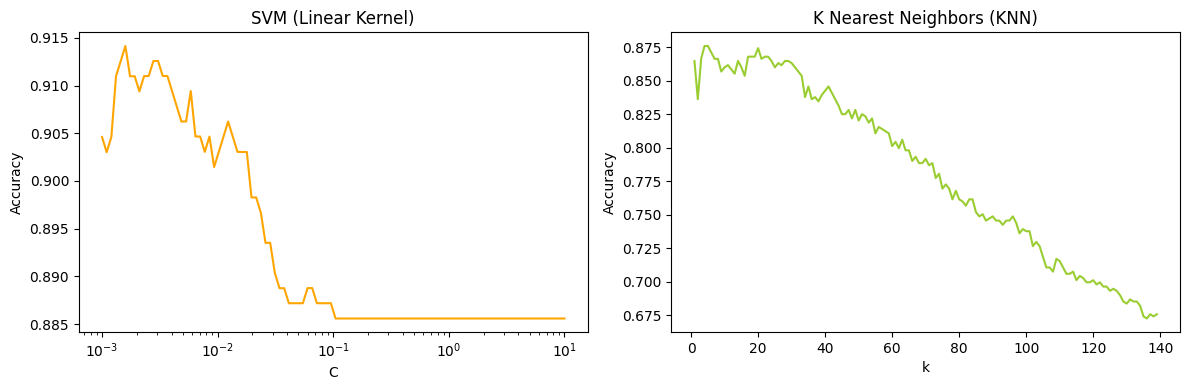

KNeighborsClassifier()

In [123]:
# Valores de C a evaluar para SVM lineal
cc_svm = np.logspace(-3, 1, 100)

# Valores de k a evaluar para KNN
kk_knn = np.arange(1, 140)

# Listas para almacenar los resultados de precisión
acc_svm = []
acc_knn = []

# Búsqueda de hiperparámetros para SVM lineal
for c in cc_svm:
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X, y):
        x_train = X[train_index, :]
        y_train = y[train_index]
        x_test = X[test_index, :]
        y_test = y[test_index]
        clf_cv = SVC(C=c, kernel='linear')
        clf_cv.fit(x_train, y_train)
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc_hyp = np.average(acc_cv)
    acc_svm.append(acc_hyp)

# Búsqueda de hiperparámetros para KNN
for k in kk_knn:
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X, y):
        x_train = X[train_index, :]
        y_train = y[train_index]
        x_test = X[test_index, :]
        y_test = y[test_index]
        clf_cv = KNeighborsClassifier(n_neighbors=k)
        clf_cv.fit(x_train, y_train)
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc_hyp = np.average(acc_cv)
    acc_knn.append(acc_hyp)

# Encontrar los hiperparámetros óptimos para SVM lineal y KNN
optimal_c_svm = cc_svm[np.argmax(acc_svm)]
optimal_k_knn = kk_knn[np.argmax(acc_knn)]

print("Optimal C for Linear SVM:", optimal_c_svm)
print("Optimal k for KNN:", optimal_k_knn)

# Graficar la precisión en función de C para SVM lineal
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(cc_svm, acc_svm, color = 'orange')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM (Linear Kernel)")

# Graficar la precisión en función de k para KNN
plt.subplot(122)
plt.plot(kk_knn, acc_knn, color = 'yellowgreen')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K Nearest Neighbors (KNN)")

plt.tight_layout()
plt.show()

# Ajustar modelos finales con hiperparámetros óptimos
final_svm = SVC(C=optimal_c_svm, kernel='linear')
final_knn = KNeighborsClassifier(n_neighbors=optimal_k_knn)

final_svm.fit(X, y)
final_knn.fit(X, y)

**Paso 4:** Una vez obtenidos los hiperparámetros óptimos, prepararemos nuestros modelos para producción:

In [128]:
# Creamos los modelos KNN y Linear SVM con rangos de hiperparámetros
knn = KNeighborsClassifier()
svm = SVC(kernel='linear')

# Definimos rangos de hiperparámetros para GridSearchCV
param_grid_knn = {
    'n_neighbors': range(1, 140)
}

param_grid_svm = {
    'C': np.logspace(-3, 1, 100)
}

# Realizamos búsqueda de hiperparámetros para KNN
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X, y)

# Realizamos búsqueda de hiperparámetros para Linear SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X, y)

# Obtenemos los hiperparámetros óptimos
optimal_k_knn = grid_search_knn.best_params_['n_neighbors']
optimal_c_svm = grid_search_svm.best_params_['C']

# Obtenemos los hiperparámetros óptimos
optimal_k_knn = grid_search_knn.best_params_['n_neighbors']
optimal_c_svm = grid_search_svm.best_params_['C']

print("Optimal k for KNN (with full dataset):", optimal_k_knn)
print("Optimal C for Linear SVM (with full dataset):", optimal_c_svm)

# Creamos los modelos finales con hiperparámetros óptimos
final_knn = KNeighborsClassifier(n_neighbors=optimal_k_knn)
final_svm = SVC(C=optimal_c_svm, kernel='linear')

# Ajustamos los modelos finales con todos los datos disponibles
final_knn.fit(X, y)
final_svm.fit(X, y)

Optimal k for KNN (with full dataset): 18
Optimal C for Linear SVM (with full dataset): 0.0093260334688322


SVC(C=0.0093260334688322, kernel='linear')

Una vez optenidos los hiperparámetros óptimos y ajustado el modelo con todos los datos. Por último, obtenemos las gráficas de exactitud en función de `C` para el modelo Linear SVM y de n_neighbors (`k`) para el modelo KNN.

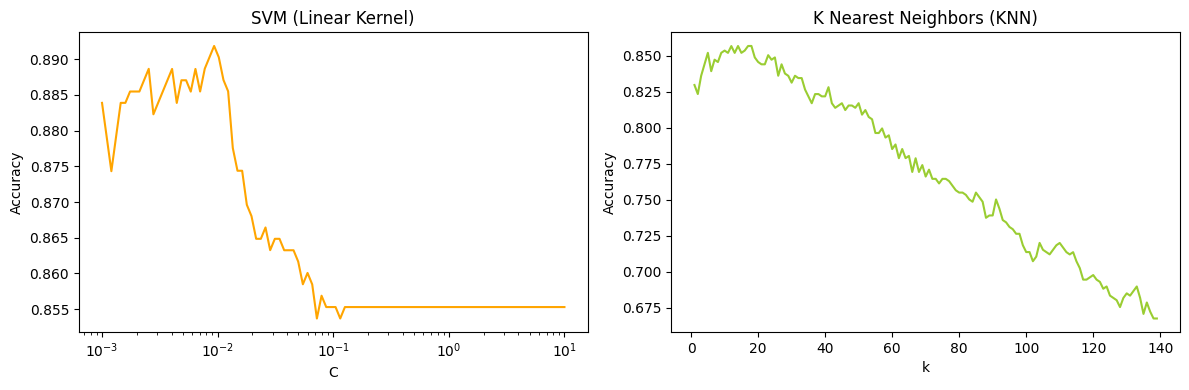

In [129]:
# Obtenemos los resultados de la búsqueda de hiperparámetros
results_knn = grid_search_knn.cv_results_
results_svm = grid_search_svm.cv_results_

# Graficamos la precisión en función de C para SVM lineal
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(cc_svm, results_svm['mean_test_score'], color='orange')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM (Linear Kernel)")

# Graficamos la precisión en función de k para KNN
plt.subplot(122)
plt.plot(kk_knn, results_knn['mean_test_score'], color='yellowgreen')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K Nearest Neighbors (KNN)")

plt.tight_layout()
plt.show()

### Conclusiones Ejercicio 2

**A. ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

En este caso, no parece haber un problema significativo de desbalanceo de clases. El conteo de clases muestra que el número de etiquetas de cada clase es bastante similar, lo que indica un buen equilibrio en la distribución de las clases. Además, el reporte de clasificación confirma esto al mostrar valores de recall similares para todas las clases, lo que sugiere que el modelo está haciendo un buen trabajo al predecir todas las clases por igual. Por lo tanto, no parece haber un problema importante de desbalanceo de clases en este conjunto de datos.

**B. ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**

En términos de efectividad en la clasificación de datos, el modelo más efectivo parece ser el Linear SVM, ya que obtiene valores de precisión, recall y F1-Score altos para la mayoría de las clases. Esto sugiere que el Linear SVM está haciendo un buen trabajo en la predicción de las diferentes clases en este conjunto de datos.

Además, el modelo RBF SVM también muestra buenos resultados, aunque ligeramente inferiores al Linear SVM. Los modelos K Nearest Neighbors (KNN) y Decision Tree tienen un rendimiento decente pero son menos efectivos en comparación con el Linear SVM y el RBF SVM. El modelo LDA (Análisis Discriminante Lineal) obtiene resultados aceptables, pero es menos efectivo en general.

**C. ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

Sí, se observa una mejora importante al optimizar los hiperparámetros en el caso del modelo K Nearest Neighbors (KNN) y el Linear SVM. En el caso del KNN, se determinó que el valor óptimo de k es 18, lo que indica que el modelo funciona mejor con un valor de k más alto que el valor predeterminado. Esto resultó en un aumento en la precisión y el rendimiento general del modelo en comparación con la evaluación inicial.

En el caso del Linear SVM, se encontró que el valor óptimo de C es 0.0093, lo que también condujo a una mejora en la precisión y el rendimiento del modelo en comparación con la evaluación inicial.

Estos resultados son en general los que se esperarían al optimizar hiperparámetros, ya que la optimización de hiperparámetros está diseñada para encontrar los valores que maximizan el rendimiento del modelo en el conjunto de datos. Por lo tanto, es razonable esperar mejoras en la precisión y el rendimiento al encontrar hiperparámetros óptimos.

**D. ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**

Encontrar hiperparámetros óptimos puede ser un proceso complicado y costoso en términos de tiempo y recursos computacionales. A continuación se presentan algunos de los inconvenientes asociados a la búsqueda de hiperparámetros:

- **Recurso intensivo:** La búsqueda de hiperparámetros a menudo implica evaluar múltiples combinaciones de hiperparámetros mediante validación cruzada. Esto puede ser computacionalmente costoso, especialmente si el conjunto de datos es grande o si el modelo es complejo.

- **Sobreajuste:** Existe el riesgo de ajustar demasiado el modelo a los datos de entrenamiento al buscar hiperparámetros. Esto puede llevar a un modelo que funciona bien en los datos de entrenamiento pero se desempeña mal en datos nuevos y no vistos.

- **Generalización limitada:** En algunos casos, los hiperparámetros óptimos pueden ser específicos del conjunto de datos particular que se está utilizando. Esto significa que los mismos hiperparámetros pueden no funcionar tan bien en un conjunto de datos diferente, lo que limita la generalización del modelo.

- **Tiempo de búsqueda:** La búsqueda de hiperparámetros puede llevar mucho tiempo, ya que implica entrenar y evaluar el modelo múltiples veces. Esto puede ser un desafío en situaciones en las que se necesita un modelo rápidamente.

---

Alfonso Pineda Cedillo | A01660394